In [50]:
import numpy as np

## Set Parameter

In [51]:
x1 = np.array([1,1,1,3,5])
print(len(x1))
print(x1)

x2 = np.array([1,1,3,3,5])
print(len(x2))
print(x2)

x3 = np.array([1,3,5,7,9])
print(len(x2))
print(x2)

y = np.array([0.1, -7.8, -6.1, -9.7, -4.2])
print(y)


value = 1 
bias = np.full(len(y), value)
print(bias)

5
[1 1 1 3 5]
5
[1 1 3 3 5]
5
[1 1 3 3 5]
[ 0.1 -7.8 -6.1 -9.7 -4.2]
[1 1 1 1 1]


## Set New column Stack

In [52]:
new_column_stack = np.column_stack((x1, x2, x3, bias))

print(len(new_column_stack))

print(new_column_stack)

5
[[1 1 1 1]
 [1 1 3 1]
 [1 3 5 1]
 [3 3 7 1]
 [5 5 9 1]]


## Func to cal parameter c

In [53]:
def cal_c_value(y):
    c = 1/len(y)*(sum(y**2))
    return c

## Func to cal parameter h

In [54]:
def cal_h_value(y,new_column_stack):
    a = 0
    h = 0
    for i in range(len(y)):
        a = a + y[i]*new_column_stack[i]
        
    h = (1/len(y))*a
        
    return h

## Func to cal parameter R

In [55]:
def cal_R_value(new_column_stack):
    a = np.zeros((len(new_column_stack[0]), len(new_column_stack[0])))  # Initialize a zero matrix of the correct size
    R = np.zeros((len(new_column_stack[0]), len(new_column_stack[0])))  # Initialize R as a zero matrix

    for i in range(len(new_column_stack)):
        a += np.outer(new_column_stack[i], new_column_stack[i])  # Compute the outer product and add it to 'a'
    
    R = (1/len(new_column_stack))*a
    
    return R

## Func to cal parameter a ... an

In [56]:
def cal_a_value(R, h):
    a = np.dot(np.linalg.inv(R), h)  # Matrix multiplication between R and h
    return a

In [57]:
c = np.round(cal_c_value(y), 2)
print(f"c : {c}")
# print(c)

h = np.round(cal_h_value(y, new_column_stack), 2)
print(f"h : {h}")
# print(h)

R = np.round(cal_R_value(new_column_stack), 2)
print("R :")
print(R)

a = np.round(cal_a_value(R, h), 2)
print("a :")
print(a)

c : 41.96
h : [-12.78 -15.22 -31.9   -5.54]
R :
[[ 7.4  7.8 15.   2.2]
 [ 7.8  9.  17.   2.6]
 [15.  17.  33.   5. ]
 [ 2.2  2.6  5.   1. ]]
a :
[ 2.03  4.67 -3.87 -2.78]


## quadratic parameter set parameter

In [58]:
learning_rate = np.array([0.05])

a_test = np.array([0, 0, 0, 0]) # a start parameter 

quad_column_stack = np.column_stack((x1, x2, x3, y)) # sort quadratic
print(quad_column_stack)

print(quad_column_stack[0])
print(new_column_stack[0])

[[ 1.   1.   1.   0.1]
 [ 1.   1.   3.  -7.8]
 [ 1.   3.   5.  -6.1]
 [ 3.   3.   7.  -9.7]
 [ 5.   5.   9.  -4.2]]
[1.  1.  1.  0.1]
[1 1 1 1]


In [59]:
print(a_test)
print(new_column_stack[0])

e = f[0]- (np.dot(a_test, new_column_stack[0]))
print(e)

w11 = a_test + 2 * learning_rate * np.dot(e, new_column_stack[0])

print(w11)


[0 0 0 0]
[1 1 1 1]
8
[0.8 0.8 0.8 0.8]


In [60]:
for i in range(len(y)):
    print(f"---------- ITERATION {i+1} ----------")
    print(f"present : {quad_column_stack[i]}")
    e = np.round(y[i]- (np.dot(a_test, new_column_stack[i])), 3)
    print(f"when f {y[i]} :")
    print(f"f = {np.dot(a_test.T, new_column_stack[i])}")
    w = np.round(a_test + 2 * learning_rate * np.dot(e, new_column_stack[i]), 3)
    
    a_test = w
    
    
    print(f"error {i+1} (when f = {y[i]}): {e}")
    print(f"weight {i+1} : ")
    print(w)

---------- ITERATION 1 ----------
present : [1.  1.  1.  0.1]
when f 0.1 :
f = 0
error 1 (when f = 0.1): 0.1
weight 1 : 
[0.01 0.01 0.01 0.01]
---------- ITERATION 2 ----------
present : [ 1.   1.   3.  -7.8]
when f -7.8 :
f = 0.06
error 2 (when f = -7.8): -7.86
weight 2 : 
[-0.776 -0.776 -2.348 -0.776]
---------- ITERATION 3 ----------
present : [ 1.   3.   5.  -6.1]
when f -6.1 :
f = -15.619999999999997
error 3 (when f = -6.1): 9.52
weight 3 : 
[0.176 2.08  2.412 0.176]
---------- ITERATION 4 ----------
present : [ 3.   3.   7.  -9.7]
when f -9.7 :
f = 23.828
error 4 (when f = -9.7): -33.528
weight 4 : 
[ -9.882  -7.978 -21.058  -3.177]
---------- ITERATION 5 ----------
present : [ 5.   5.   9.  -4.2]
when f -4.2 :
f = -281.99899999999997
error 5 (when f = -4.2): 277.799
weight 5 : 
[129.017 130.921 228.961  24.603]


## MPL 

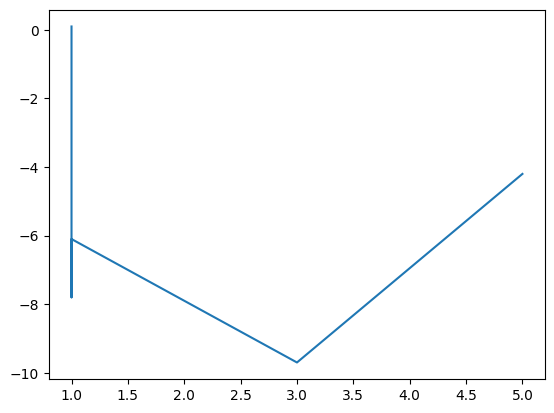

In [61]:
import matplotlib.pyplot as plt

plt.plot(x1 , y)

In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

print(sigmoid(-1))

0.2689414213699951
